<a href="https://colab.research.google.com/github/Bharathkumar1011/Air-quality-index/blob/main/boston_housing_selva86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns# visulisaton
import matplotlib.pyplot as plt #plotting(just matplotlib cant make plots)
import warnings # learn why
%matplotlib inline
warnings.filterwarnings('ignore')


In [96]:
bos_df = pd.read_csv('/content/BostonHousing selva86.csv')

In [97]:
bos_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [98]:
bos_df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [99]:
bos_df.shape

(506, 14)

In [100]:
bos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [101]:
bos_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [102]:
bos_df.isin([-200]).sum(axis=0)#just experiment

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [103]:
#Statistical info
bos_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [104]:
#datatype info
bos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Exploratory Data Analysis

In [105]:
bos_df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

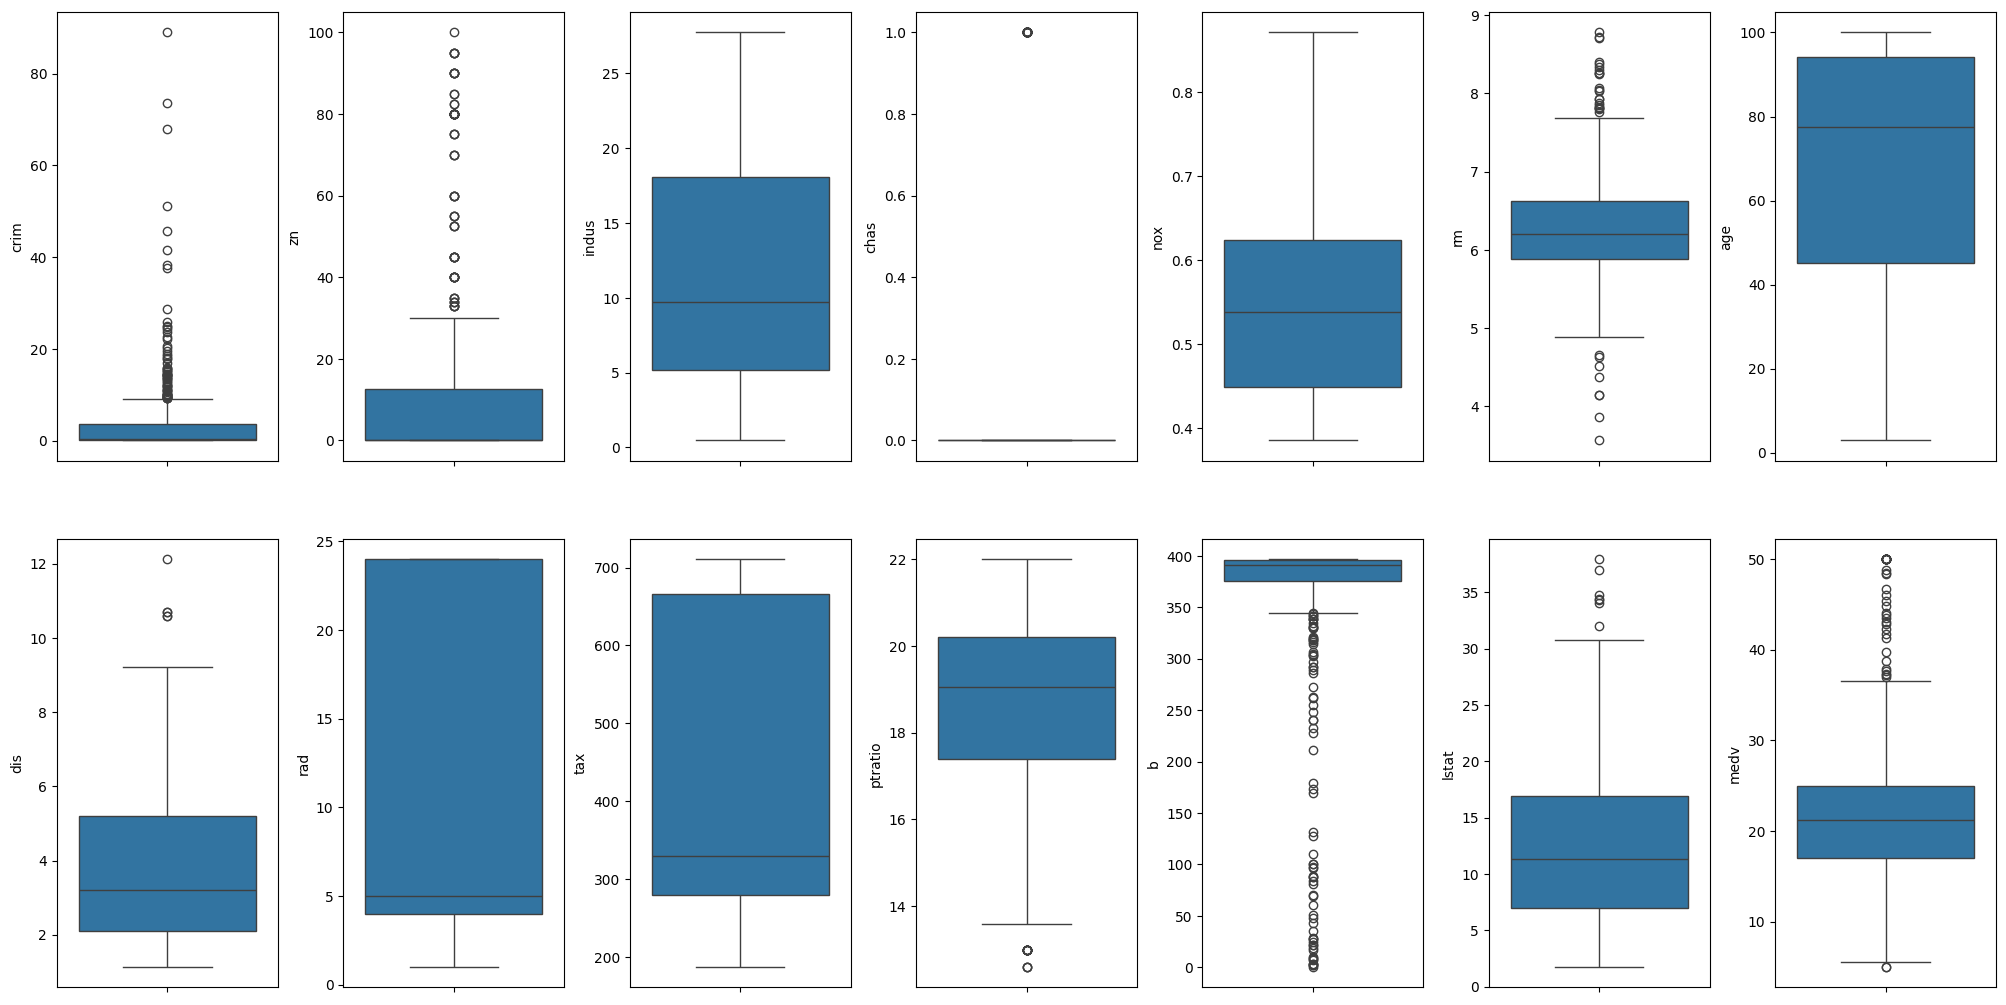

In [106]:
# create box plots
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in bos_df.items():
    sns.boxplot(y=col, data=bos_df,ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7,h_pad=5.0)



THE dots in above figs are called outliners ...more outlners= less acuurate data.

above first are have more outliiners means it wont floow the uniform distribution to make the log transformation... ect .....

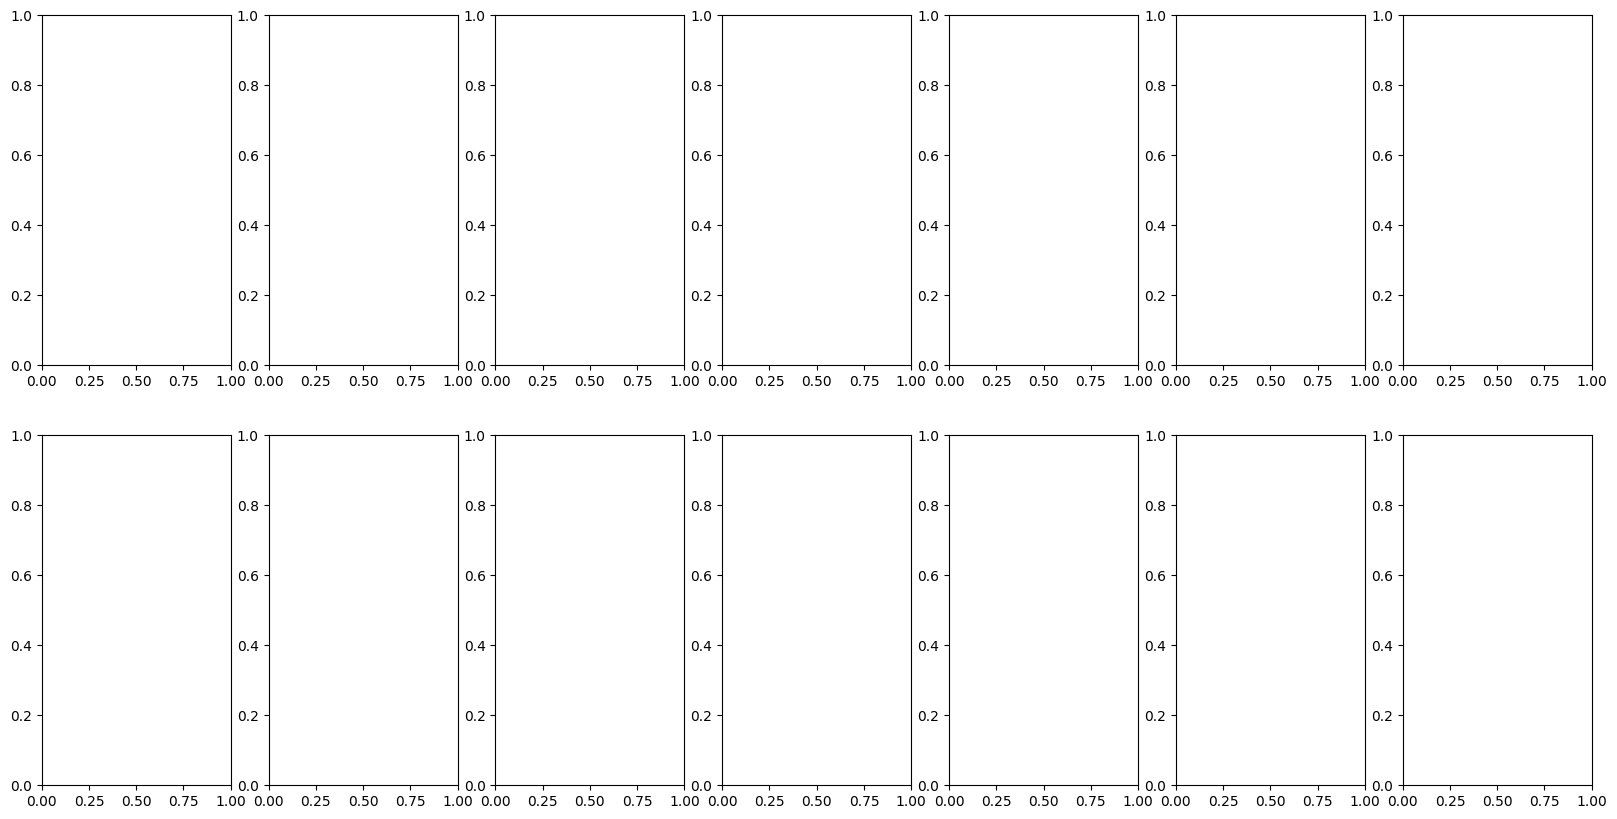

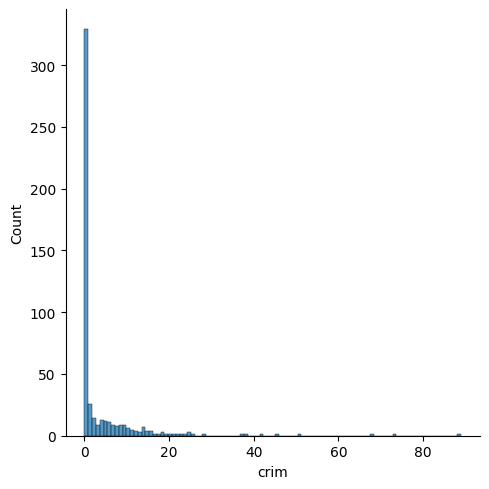

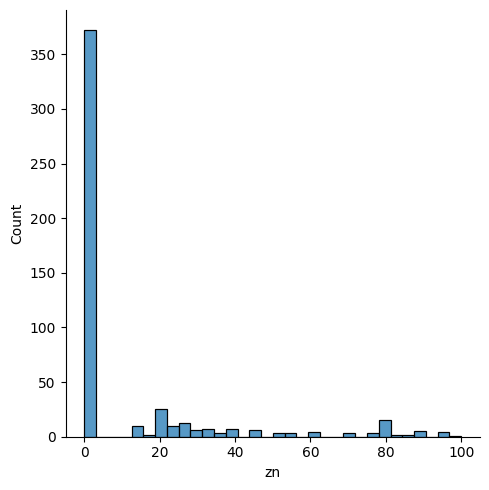

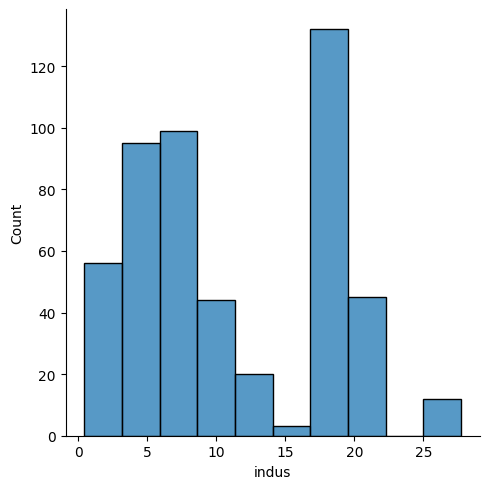

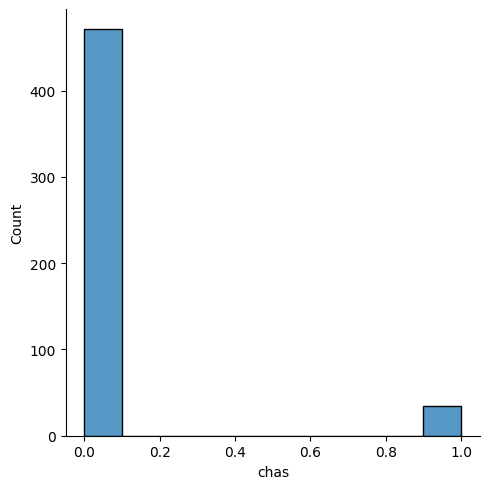

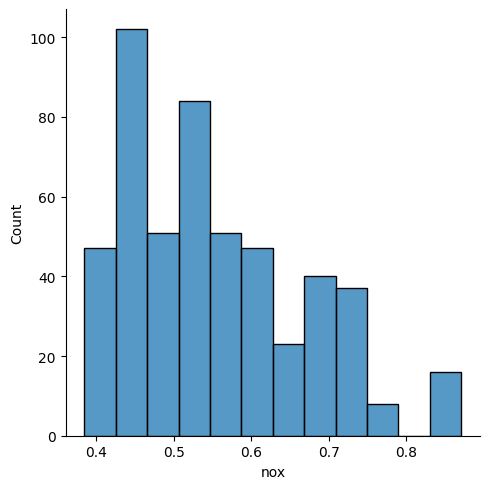

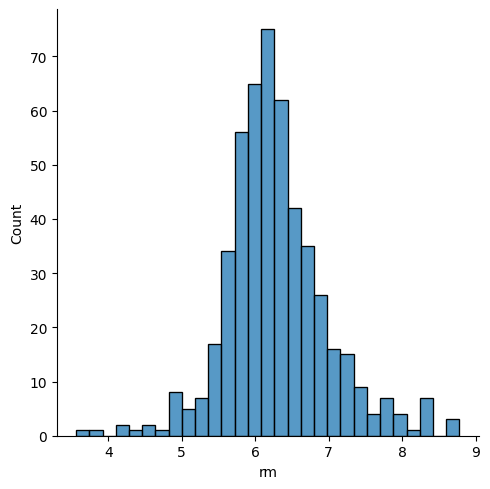

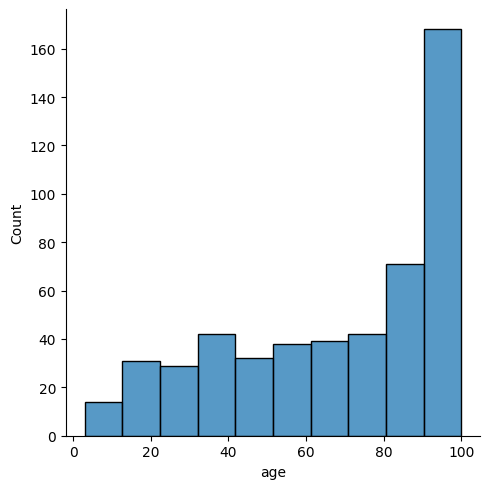

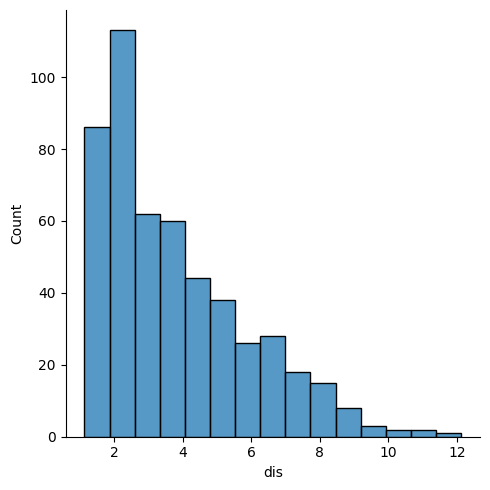

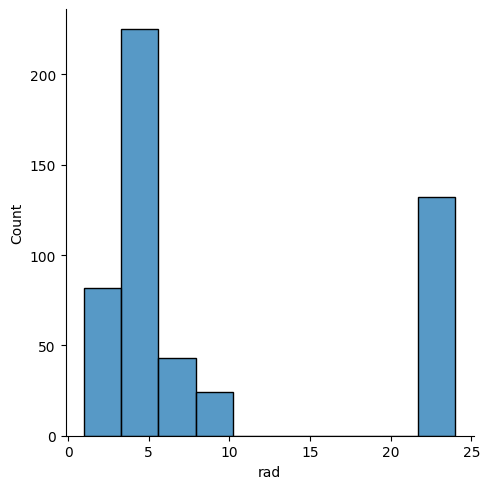

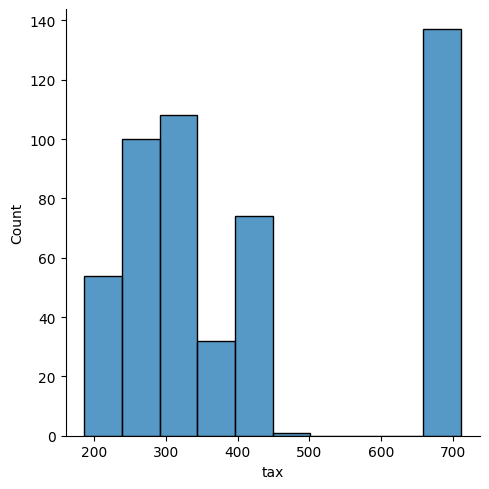

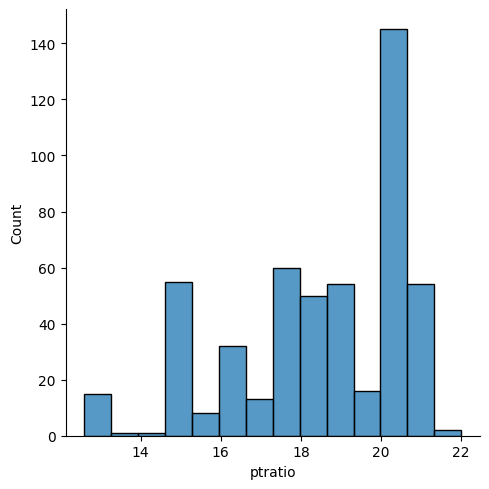

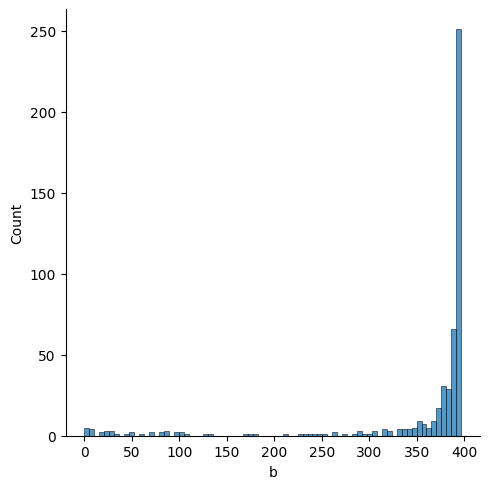

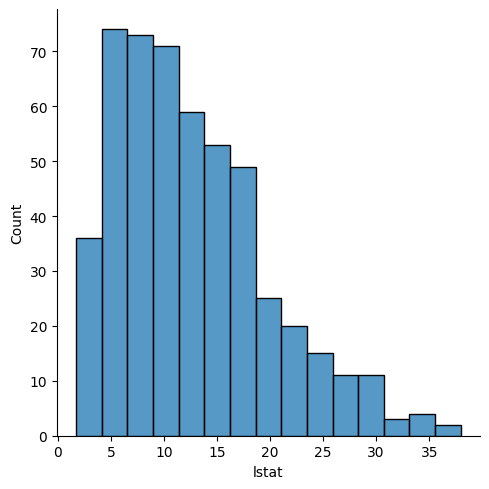

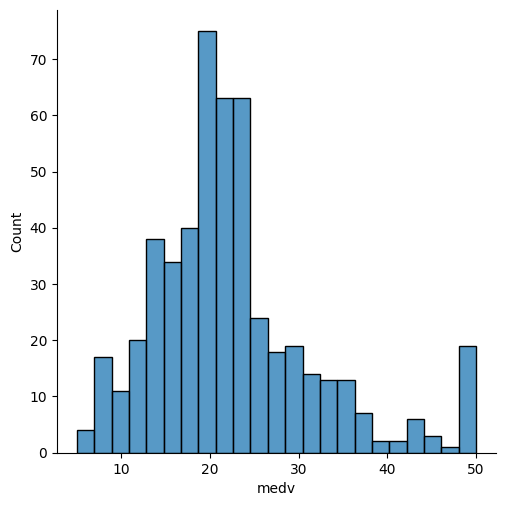

In [107]:
# Create Disk plot
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in bos_df.items():
    sns.displot(value,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7,h_pad=5.0)


medv our output looks good and normlly distibuted..

but we gonfg to do minmaxnormalization

In [108]:
## MINMAXX NORMALIZATION

cols = ['crim','zn','tax','b']
for col in cols:
  # find min and max of that column
  minimum = min(bos_df[col])
  maximum = max(bos_df[col])
  bos_df[col] = (bos_df[col]-minimum) / (maximum-minimum)#formula


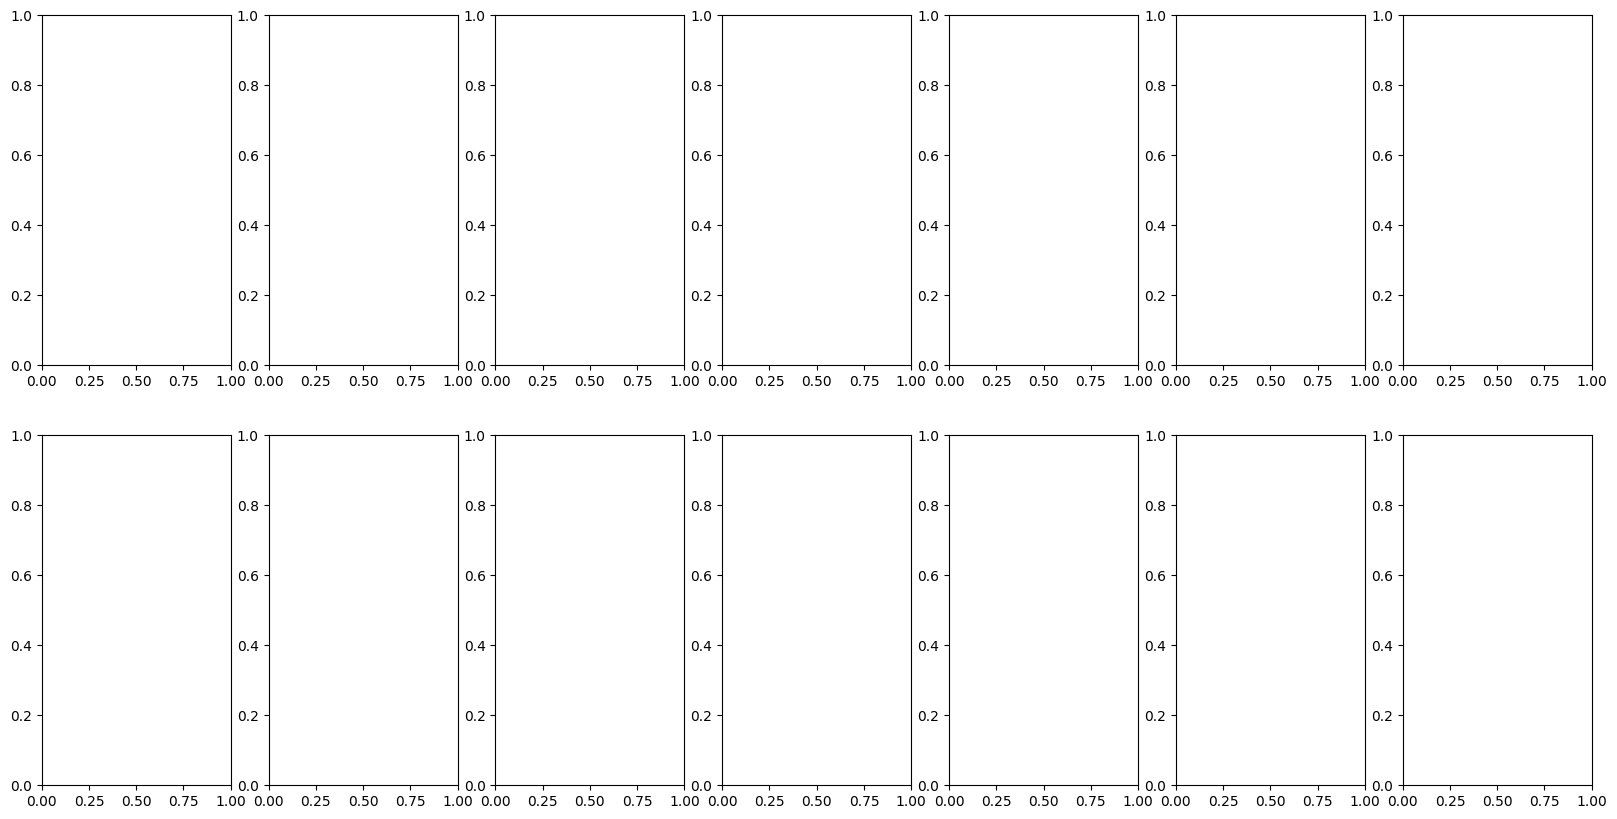

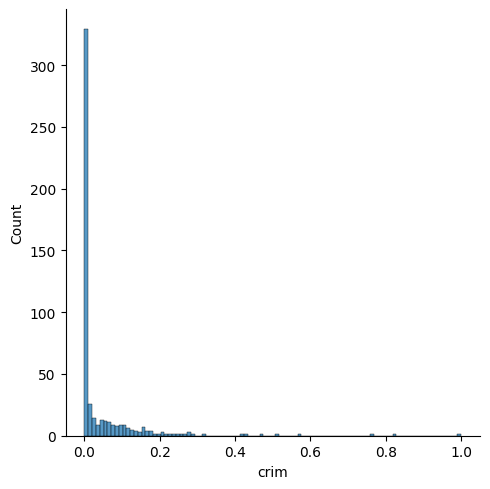

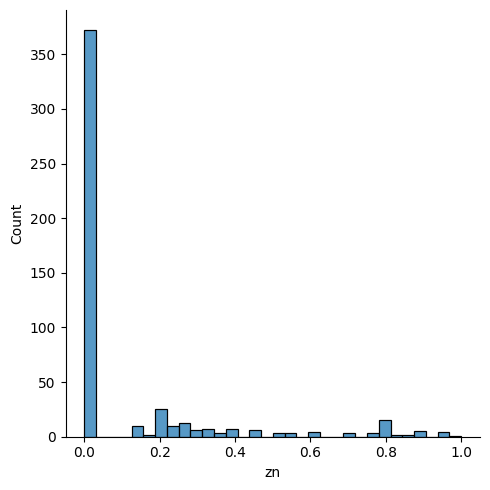

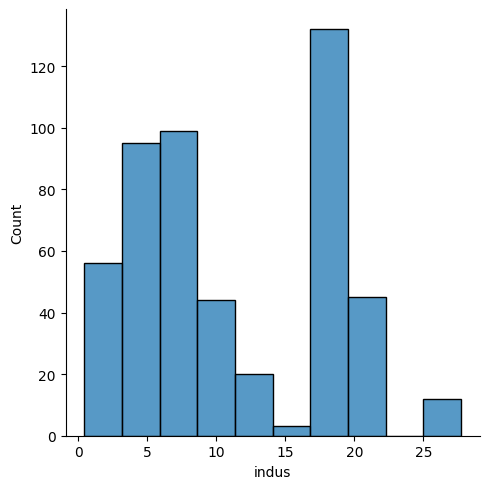

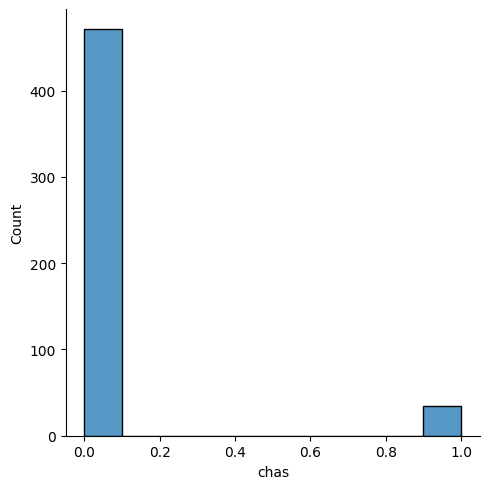

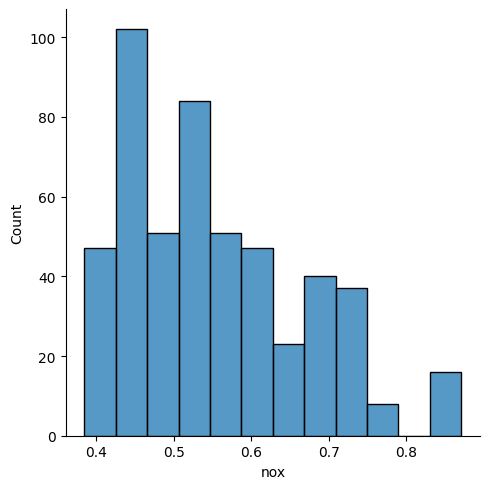

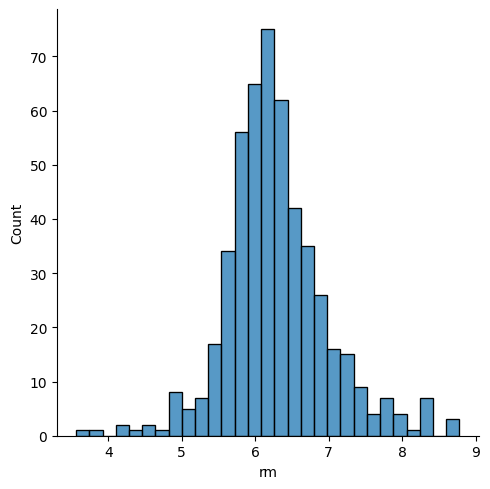

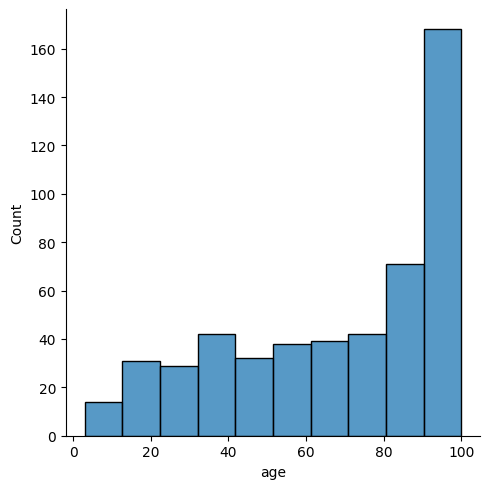

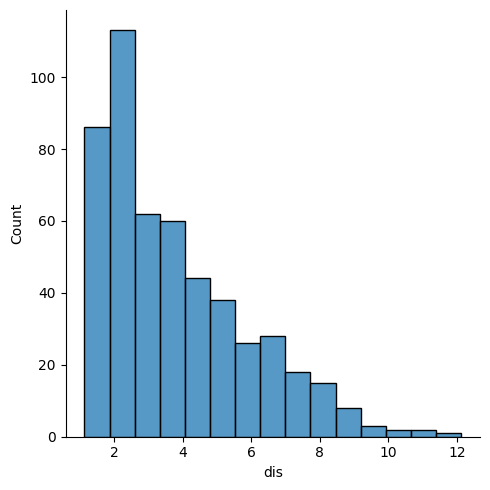

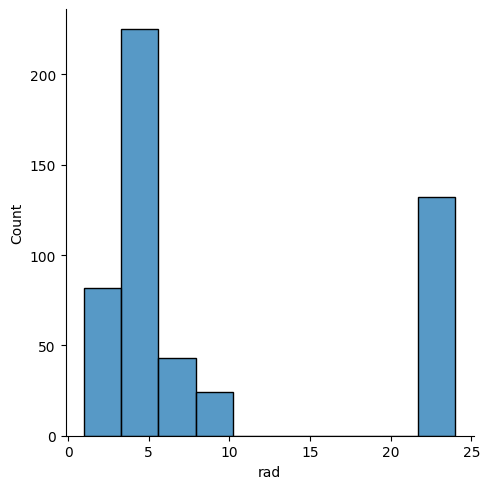

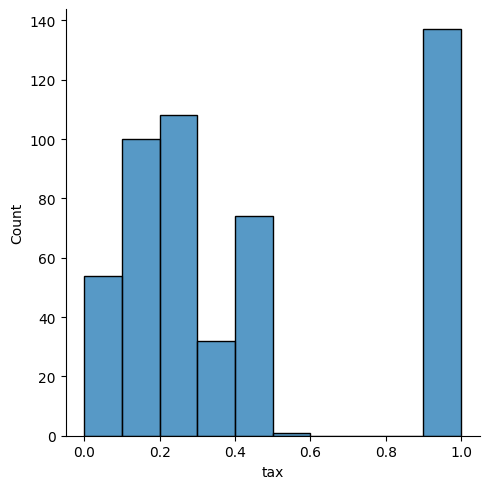

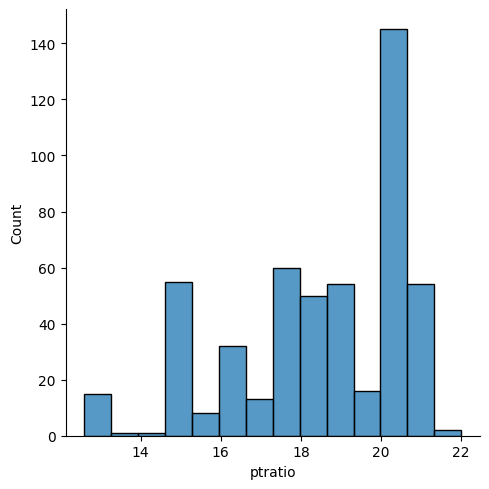

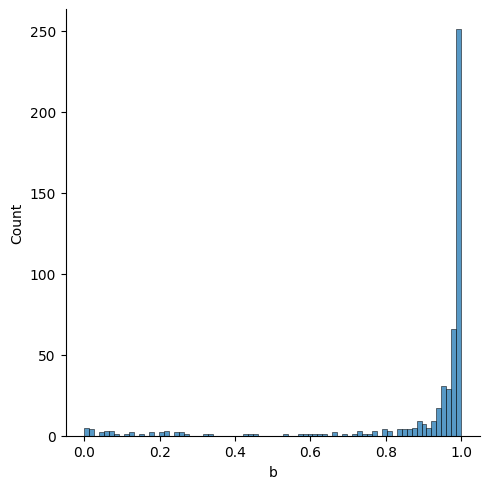

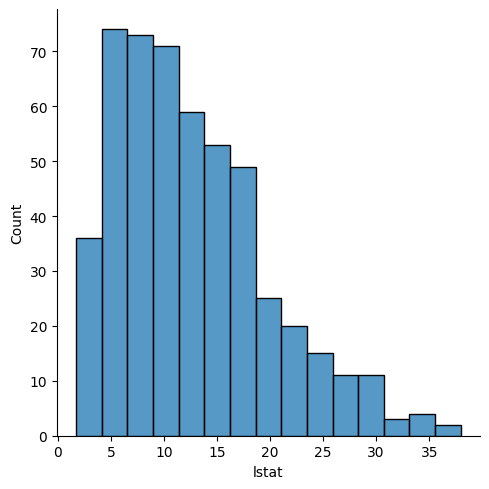

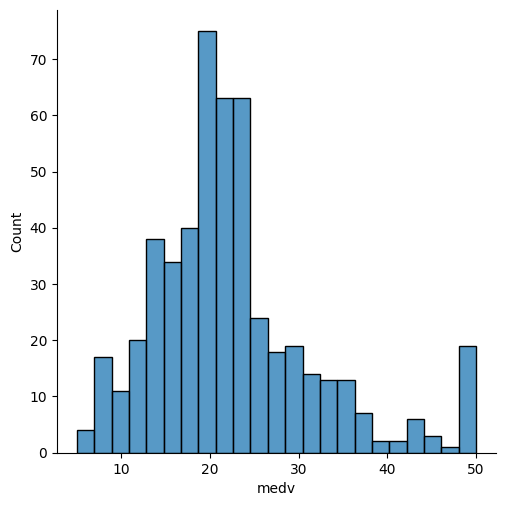

In [109]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in bos_df.items():
    sns.displot(value,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7,h_pad=5.0)

In [110]:
#STANDARDIZATON(uses mean and standrd deviation for dtadardz )
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#FIT OUR DATA
scaled_cols  = scalar.fit_transform(bos_df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()


,crim,zn,tax,b
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [111]:
for col in cols:
  bos_df[col] = scaled_cols[col]

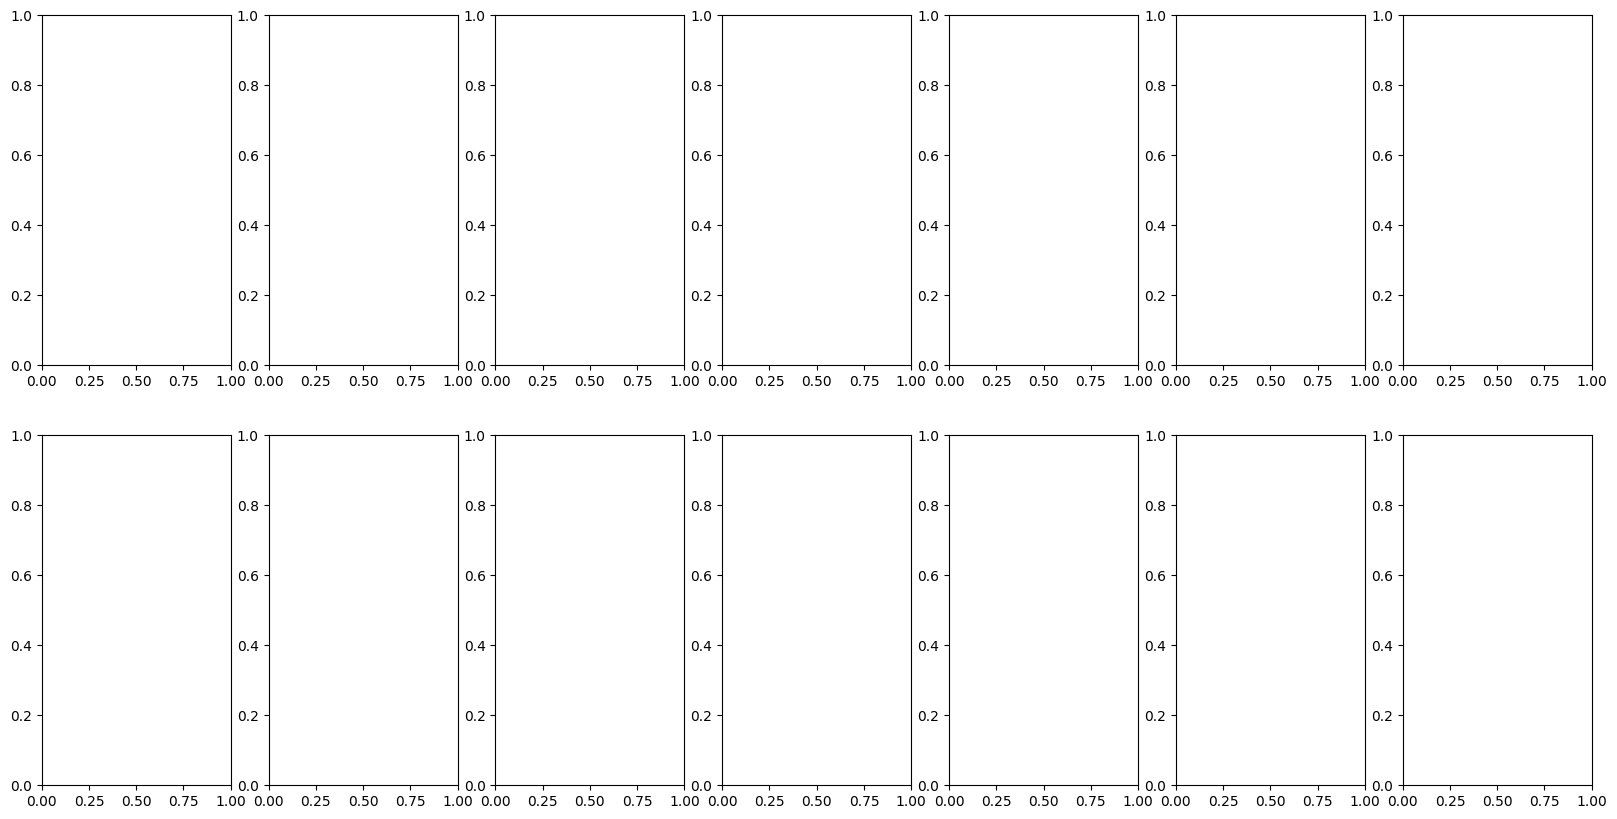

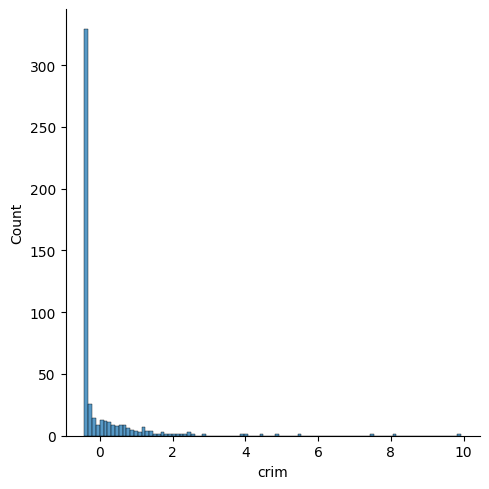

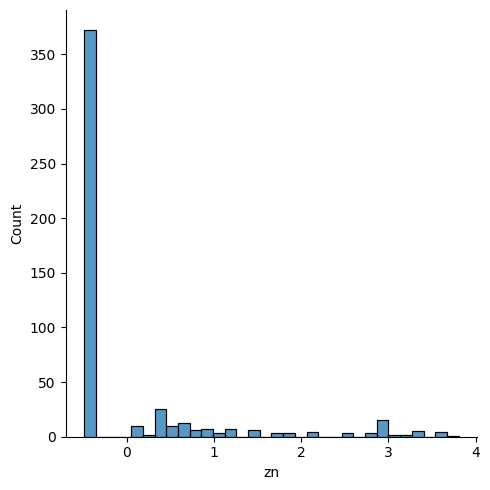

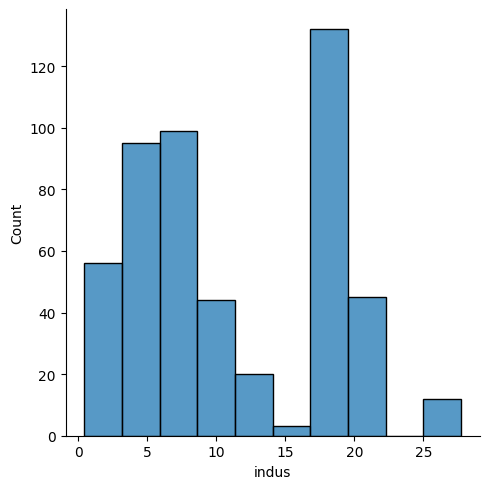

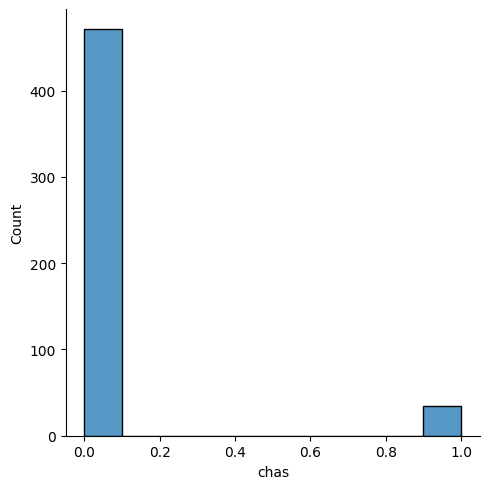

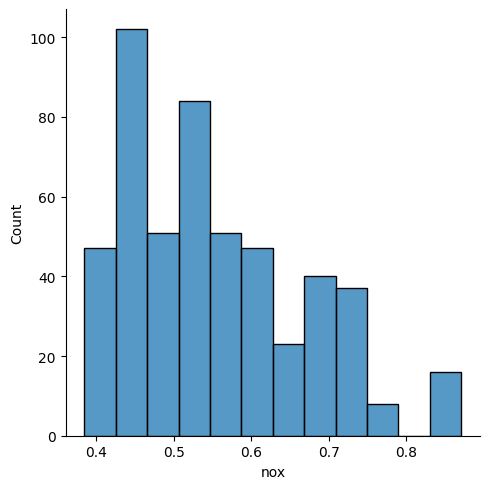

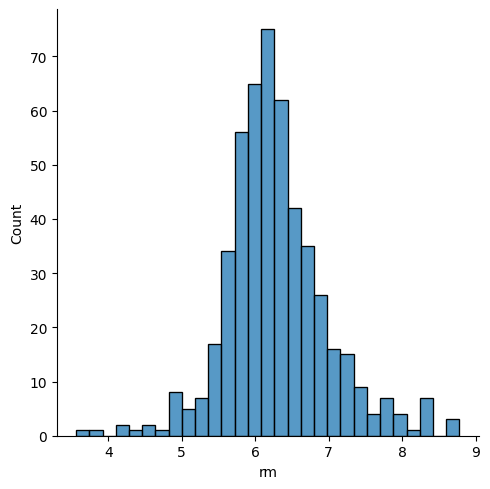

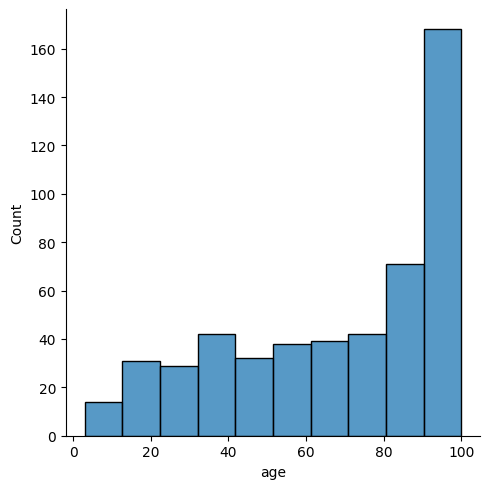

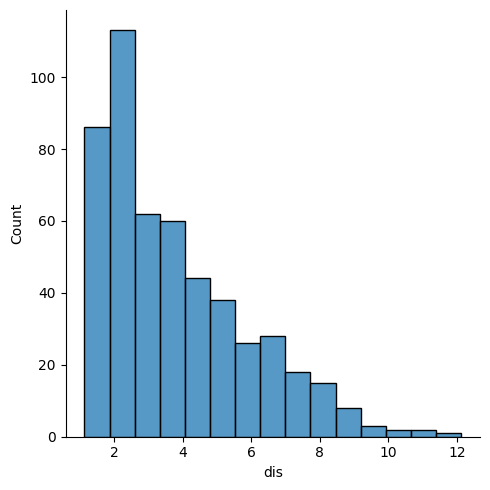

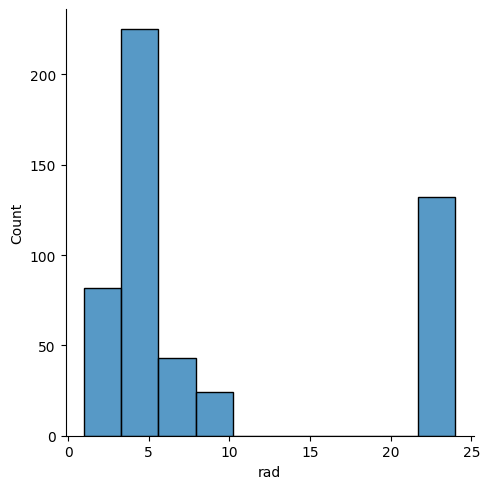

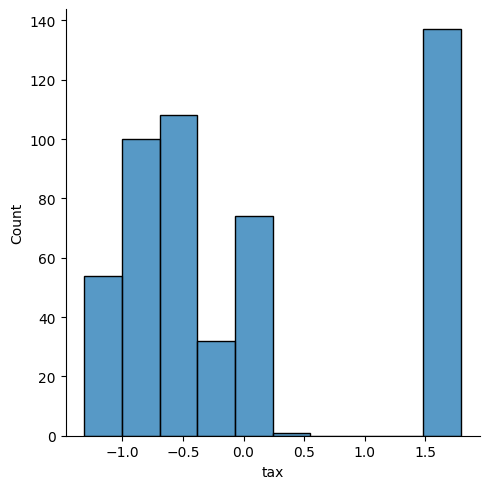

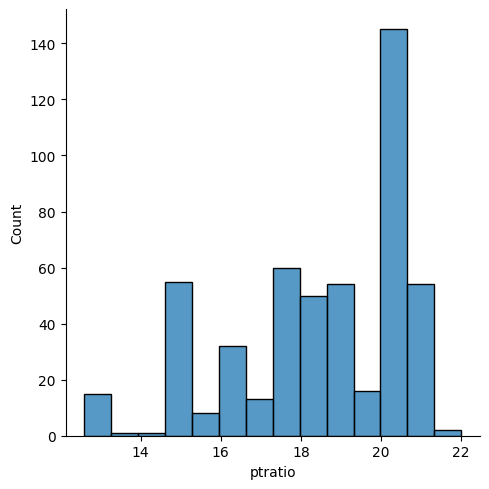

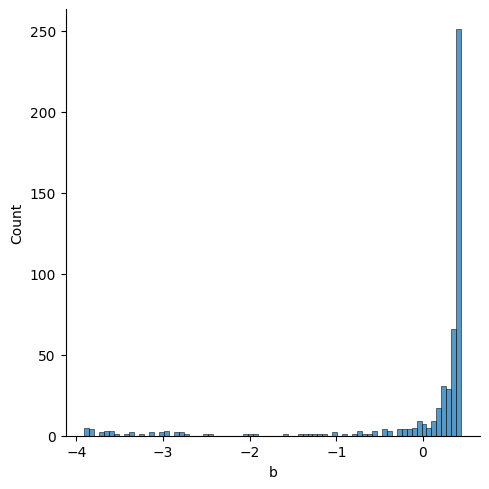

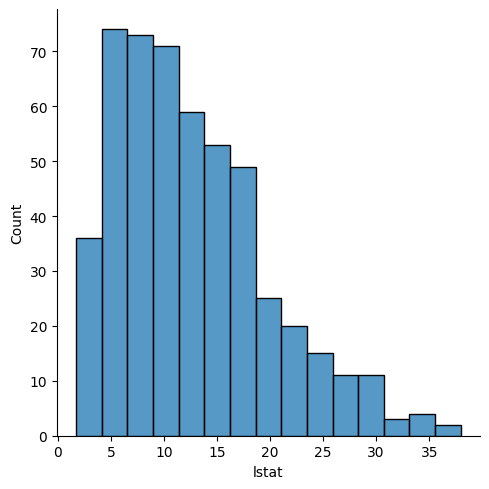

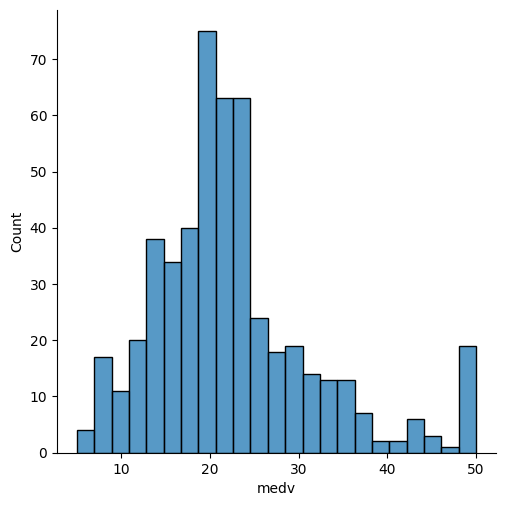

In [112]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in bos_df.items():
    sns.displot(value,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7,h_pad=5.0)

**Overfitting vs Underfitting**

underfitting:less traing
             less inputs
             not filtered all errors
apropriyte fitting:good/avarage traing
                   good/avarage inputs
overfitting: toomuch/90-100 trning
             too mny inputs
             good for predicts but good for testing

**Coorelation Matrix**

<Axes: >

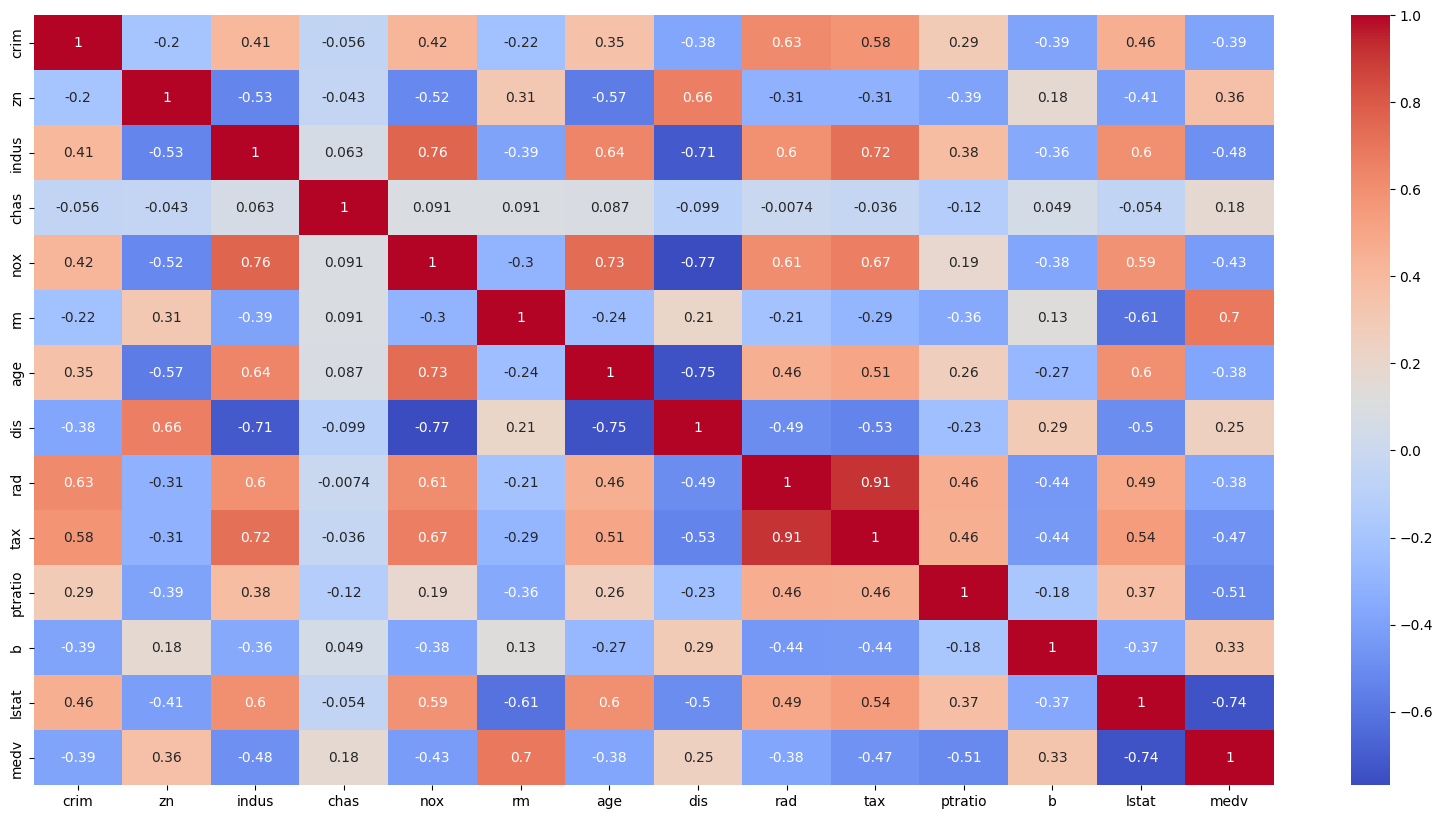

In [113]:
corr = bos_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True , cmap='coolwarm')

<Axes: xlabel='lstat', ylabel='medv'>

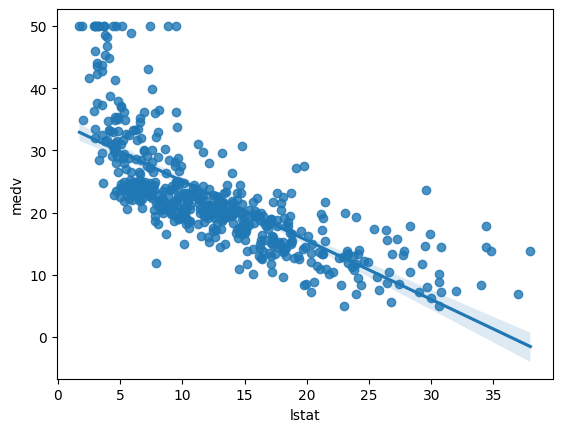

In [114]:
sns.regplot(y=bos_df['medv'], x= bos_df['lstat'])

<Axes: xlabel='rm', ylabel='medv'>

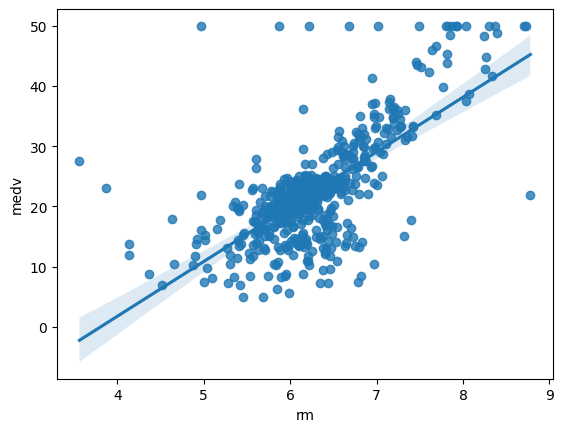

In [115]:
sns.regplot(y=bos_df['medv'], x= bos_df['rm'])

**Input Split**

In [116]:
 x = bos_df.drop(columns=['medv', 'rad'] , axis=1)
 y = bos_df['medv']


**MODEL TRAINING**

In [119]:
from sklearn.model_selection import cross_val_score, train_test_split #crossv vl score predicts whic model performs best
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    #train the model
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
    model.fit(x_train, y_train)

    # predict  the training set
    pred = model.predict(x_test)

    # perform cross-validtion
    cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print("CV Score:", cv_score)

Model Report
MSE: 23.871005067364944
CV Score: 35.58136621076916


<Axes: title={'center': 'Model Coefficients'}>

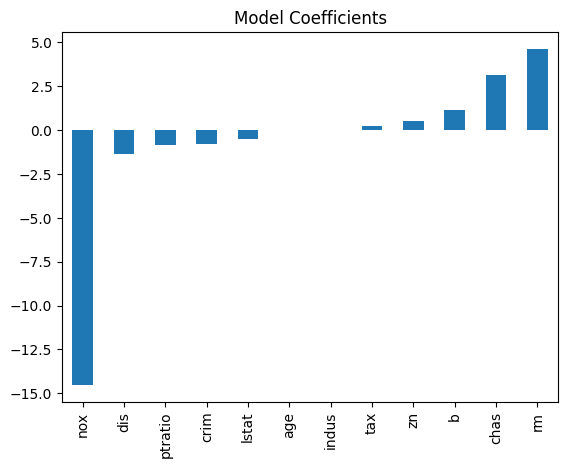

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()#basic model lke regression normalization is important
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind= 'bar' , title= 'Model Coefficients')

Model Report
MSE: 20.126062992125988
CV Score: 44.237143661424966


<Axes: title={'center': 'Feature Importance'}>

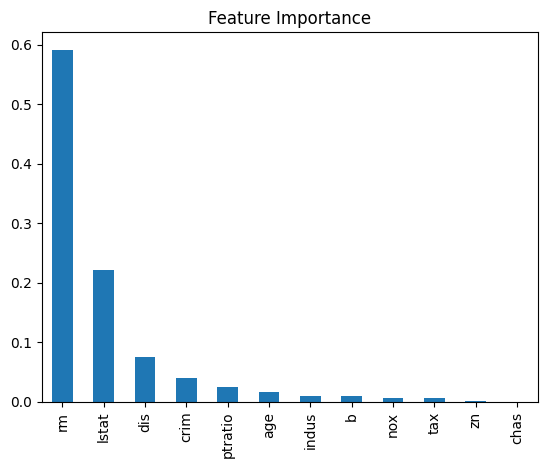

In [130]:
# diferent model  DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar' , title= 'Feature Importance')

Model Report
MSE: 11.42080160629921
CV Score: 20.162468867579097


<Axes: title={'center': 'Feature Importance'}>

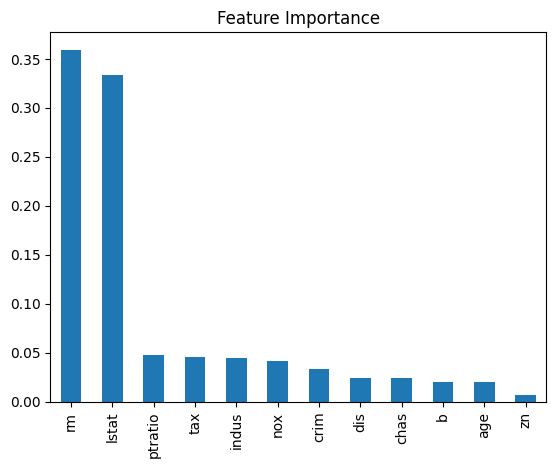

In [135]:
# model ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar' , title= 'Feature Importance')

**LESSER CV SCORE BETTER MODEL**

Model Report
MSE: 10.125711733433059
CV Score: 28.89856354837006


<Axes: title={'center': 'Feature Importance'}>

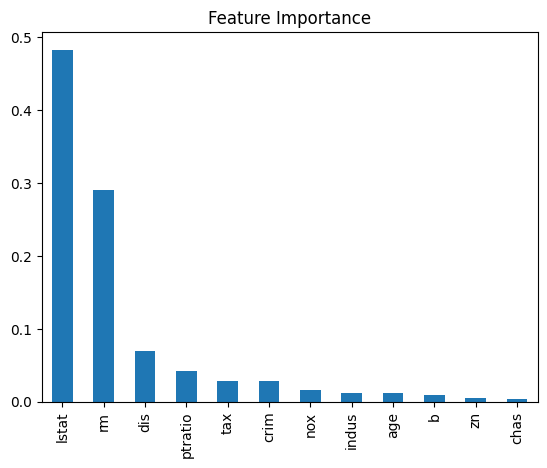

In [139]:
# one of the best model tht has been used for kggle comptton
#MODEL  XGBOOST

import xgboost as xgb
model = xgb.XGBRegressor(max_depth = 8, n_estimators = 200)
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar' , title= 'Feature Importance')
